In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Data

https://waqi.info/

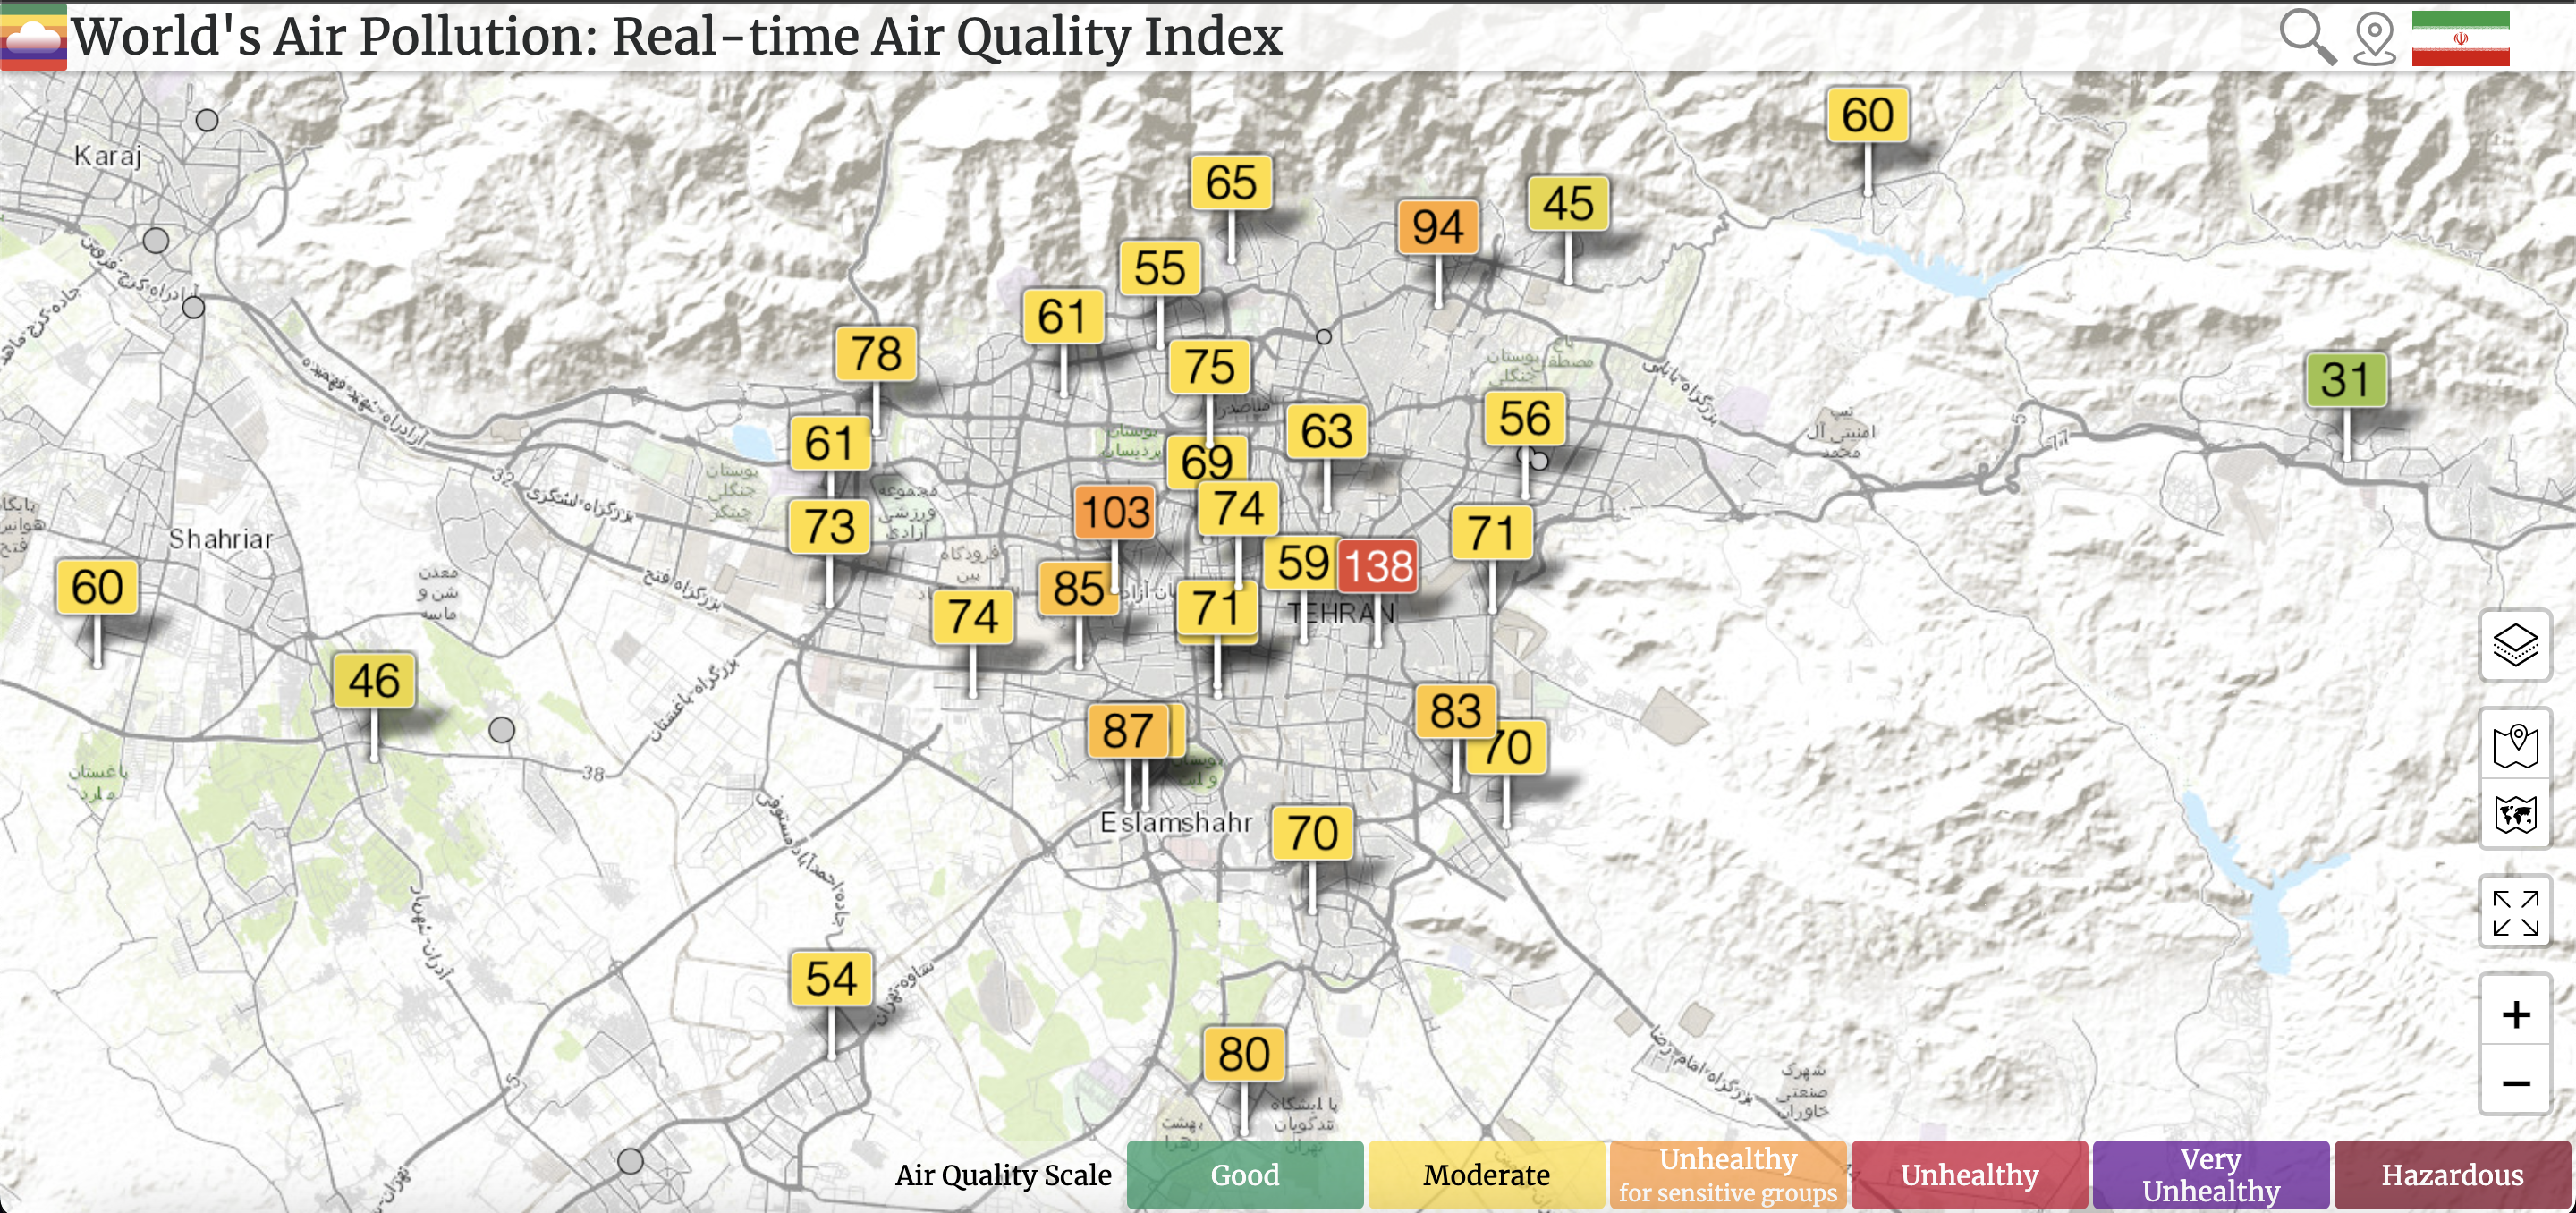

https://aqicn.org/city/iran/tehran/tehran-park-shokoufeh/

https://aqicn.org/country/poland/

https://www.kaggle.com/datasets/wisekinder/poland-air-quality-monitoring-dataset-2017-2023?resource=download

https://aqicn.org/city/iran/tehran/sharif-university/

https://aqicn.org/city/iran/tehran/shahre-rey/

In [201]:
dataset_path_shahrerey = '/Users/mina/Desktop/Master of Data Science/3rd Semester/Workshop I - "Environmental Data Analytics"/datasets/shahre-rey, tehran-air-quality.csv'
dataset_path_sharifuniversity = '/Users/mina/Desktop/Master of Data Science/3rd Semester/Workshop I - "Environmental Data Analytics"/datasets/sharif-university, tehran-air-quality.csv'

In [202]:
# Load the dataset
df_shahrerey = pd.read_csv(dataset_path_shahrerey)
df_sharifuniversity = pd.read_csv(dataset_path_sharifuniversity)

In [203]:
df_shahrerey.describe()

date  pm25  pm10    o3   no2   so2    co
count        2911  2911  2911  2911  2911  2911  2911
unique       2911   168   143   132   114    78    89
top     2024/10/1                                    
freq            1   476  1196  1569   670   612   609

In [204]:
df_sharifuniversity.describe()

date  pm25  pm10    o3   no2   so2    co
count        2776  2776  2776  2776  2776  2776  2776
unique       2776   160   145   118   109    58    80
top     2024/10/1                                    
freq            1   506   424  1710   483   479  1334

# Data Cleaning

In [205]:
# Check the data types of columns in the Shahrerey dataset
print(df_shahrerey.dtypes)

# Check the data types of columns in the Sharif University dataset
print(df_sharifuniversity.dtypes)


date     object
 pm25    object
 pm10    object
 o3      object
 no2     object
 so2     object
 co      object
dtype: object
date     object
 pm25    object
 pm10    object
 o3      object
 no2     object
 so2     object
 co      object
dtype: object


In [206]:
# Check for missing values in both datasets
print(df_shahrerey.isnull().sum())
print(df_sharifuniversity.isnull().sum())

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64


In [207]:
df_sharifuniversity

date  pm25  pm10   o3   no2  so2   co
0     2024/10/1   141    83   54   102   21   47
1     2024/10/2   150    74        103   28   43
2     2024/10/3   119    68        103   16   27
3     2024/10/4   110                           
4     2024/10/6   103                           
...         ...   ...   ...  ...   ...  ...  ...
2771   2022/3/7                     51    8     
2772  2016/6/30                     90   12     
2773  2015/12/3                     20   13   23
2774  2015/12/4                     14        34
2775  2015/6/11                                8

[2776 rows x 7 columns]

In [208]:
# Check for empty strings or spaces
print((df_sharifuniversity == '').sum())
print((df_sharifuniversity == ' ').sum())

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64
date        0
 pm25     506
 pm10     424
 o3      1710
 no2      483
 so2      479
 co      1334
dtype: int64


In [209]:
print((df_shahrerey == ' ').sum())

date        0
 pm25     476
 pm10    1196
 o3      1569
 no2      670
 so2      612
 co       609
dtype: int64


In [210]:
# Replace empty strings or spaces with NaN
df_shahrerey.replace(' ', pd.NA, inplace=True)
df_sharifuniversity.replace(' ', pd.NA, inplace=True)

In [211]:
# Check for missing values in both datasets
print(df_shahrerey.isnull().sum())
print(df_sharifuniversity.isnull().sum())

date        0
 pm25     476
 pm10    1196
 o3      1569
 no2      670
 so2      612
 co       609
dtype: int64
date        0
 pm25     506
 pm10     424
 o3      1710
 no2      483
 so2      479
 co      1334
dtype: int64


In [212]:
df_shahrerey.fillna(method='ffill', inplace=True)
df_sharifuniversity.fillna(method='ffill', inplace=True)


In [213]:
# Check for missing values in both datasets
print(df_shahrerey.isnull().sum())
print(df_sharifuniversity.isnull().sum())

date     0
 pm25    0
 pm10    0
 o3      6
 no2     0
 so2     0
 co      0
dtype: int64
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64


In [214]:
df_shahrerey.fillna(df_shahrerey.mean(), inplace=True)
df_sharifuniversity.fillna(df_sharifuniversity.mean(), inplace=True)


/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_2949/2091145211.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_shahrerey.fillna(df_shahrerey.mean(), inplace=True)
/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_2949/2091145211.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sharifuniversity.fillna(df_sharifuniversity.mean(), inplace=True)


In [215]:
# Check for missing values in both datasets
print(df_shahrerey.isnull().sum())
print(df_sharifuniversity.isnull().sum())

date     0
 pm25    0
 pm10    0
 o3      6
 no2     0
 so2     0
 co      0
dtype: int64
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64


In [216]:
df_shahrerey.dropna(inplace=True)
df_sharifuniversity.dropna(inplace=True)


In [217]:
# Check for missing values in both datasets
print(df_shahrerey.isnull().sum())
print(df_sharifuniversity.isnull().sum())

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64
date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64


In [218]:
df_shahrerey.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [219]:
df_sharifuniversity.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [220]:
# Remove extra spaces from column names
df_shahrerey.columns = df_shahrerey.columns.str.strip()
df_sharifuniversity.columns = df_sharifuniversity.columns.str.strip()

# Check if the column names are fixed
print(df_shahrerey.columns)
print(df_sharifuniversity.columns)


Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')
Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')


In [221]:
# Convert the 'date' column to datetime format
df_shahrerey['date'] = pd.to_datetime(df_shahrerey['date'], format='%Y/%m/%d')
df_sharifuniversity['date'] = pd.to_datetime(df_sharifuniversity['date'], format='%Y/%m/%d')


In [222]:
df_shahrerey

date  pm25 pm10    o3   no2  so2   co
6    2024-07-03   119   72    75   102   20   42
7    2024-07-04   127   75    75   102   15   45
8    2024-07-05   147   62    57    82   19   36
9    2024-07-06   117   53    57    62   16   18
10   2024-07-07   108   52    57    50   12   14
...         ...   ...  ...   ...   ...  ...  ...
2906 2022-10-10    62   71   119    43   49   49
2907 2015-11-21    62   71   119    43    6   45
2908 2015-11-22    62   71   119    43    6   33
2909 2016-08-30    62   71   119    43    6   51
2910 2015-05-08    62   71   119    43    6   44

[2905 rows x 7 columns]

In [223]:
# Sort both datasets by date
df_shahrerey.sort_values(by='date', inplace=True)
df_sharifuniversity.sort_values(by='date', inplace=True)

# Reset index after sorting
df_shahrerey.reset_index(drop=True, inplace=True)
df_sharifuniversity.reset_index(drop=True, inplace=True)


In [224]:
# Check for duplicate dates
duplicate_dates_shahrerey = df_shahrerey[df_shahrerey.duplicated(subset='date', keep=False)]
duplicate_dates_sharifuniversity = df_sharifuniversity[df_sharifuniversity.duplicated(subset='date', keep=False)]

print(duplicate_dates_shahrerey)
print(duplicate_dates_sharifuniversity)

Empty DataFrame
Columns: [date, pm25, pm10, o3, no2, so2, co]
Index: []
Empty DataFrame
Columns: [date, pm25, pm10, o3, no2, so2, co]
Index: []


In [225]:
# List of pollutant columns
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Convert columns to numeric for Shahrerey
df_shahrerey[pollutants] = df_shahrerey[pollutants].apply(pd.to_numeric, errors='coerce')

# Convert columns to numeric for Sharif University
df_sharifuniversity[pollutants] = df_sharifuniversity[pollutants].apply(pd.to_numeric, errors='coerce')

# Check if conversion was successful by checking data types
print(df_shahrerey.dtypes)
print(df_sharifuniversity.dtypes)

date    datetime64[ns]
pm25             int64
pm10             int64
o3               int64
no2              int64
so2              int64
co               int64
dtype: object
date    datetime64[ns]
pm25             int64
pm10             int64
o3               int64
no2              int64
so2              int64
co               int64
dtype: object


# Stats

In [226]:
# Define the list of all pollutants to calculate statistics for
pollutants_all = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Calculate summary statistics for Shahrerey
summary_stats_shahrerey_all = df_shahrerey[pollutants_all].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurtosis'])

# Calculate summary statistics for Sharif University
summary_stats_sharifuniversity_all = df_sharifuniversity[pollutants_all].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurtosis'])

# Rename the columns to reflect the station names for easier comparison
summary_stats_shahrerey_all.columns = [col + '_Shahrerey' for col in summary_stats_shahrerey_all.columns]
summary_stats_sharifuniversity_all.columns = [col + '_SharifUniversity' for col in summary_stats_sharifuniversity_all.columns]

# Combine both summary statistics into a single table for comparison
summary_stats_combined_all = pd.concat([summary_stats_shahrerey_all, summary_stats_sharifuniversity_all], axis=1)

# Display the combined summary statistics
print(summary_stats_combined_all)


          pm25_Shahrerey  pm10_Shahrerey  o3_Shahrerey  no2_Shahrerey  \
mean           96.201721       72.753528     45.293287      57.151463   
median         92.000000       61.000000     52.000000      55.000000   
std            34.534427       60.088409     31.250598      25.348340   
var          1192.626650     3610.616917    976.599903     642.538346   
min            17.000000        2.000000      1.000000       5.000000   
max           500.000000      500.000000    500.000000     120.000000   
skew            1.708424        6.075320      2.109525       0.204841   
kurtosis       13.325124       39.872473     17.167115      -1.002362   

          so2_Shahrerey  co_Shahrerey  pm25_SharifUniversity  \
mean          19.032358     30.772461             103.336095   
median        18.000000     27.000000             101.000000   
std           12.214296     13.967724              31.357396   
var          149.189035    195.097313             983.286279   
min            1.00000

# Time Series

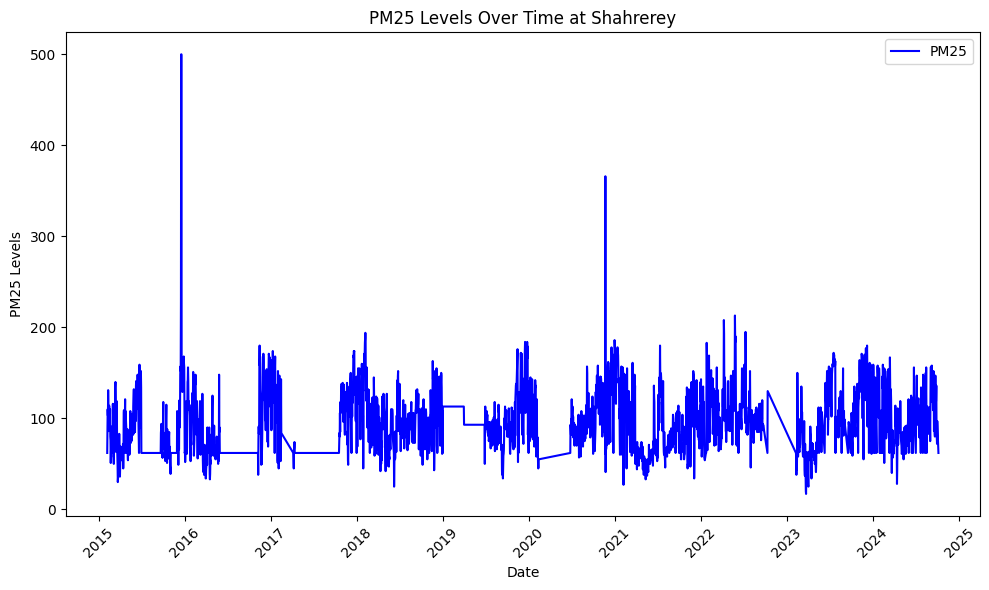

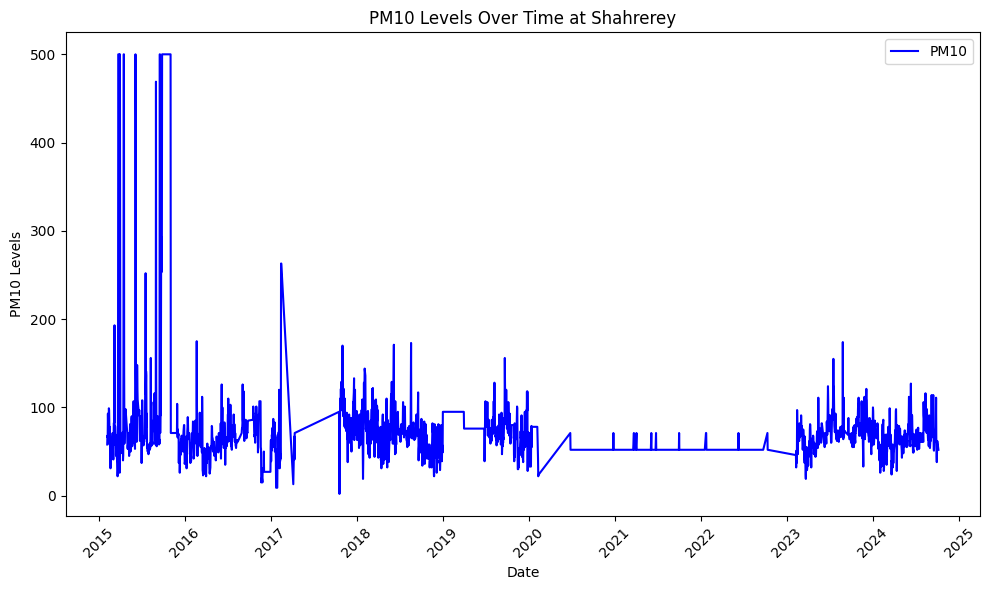

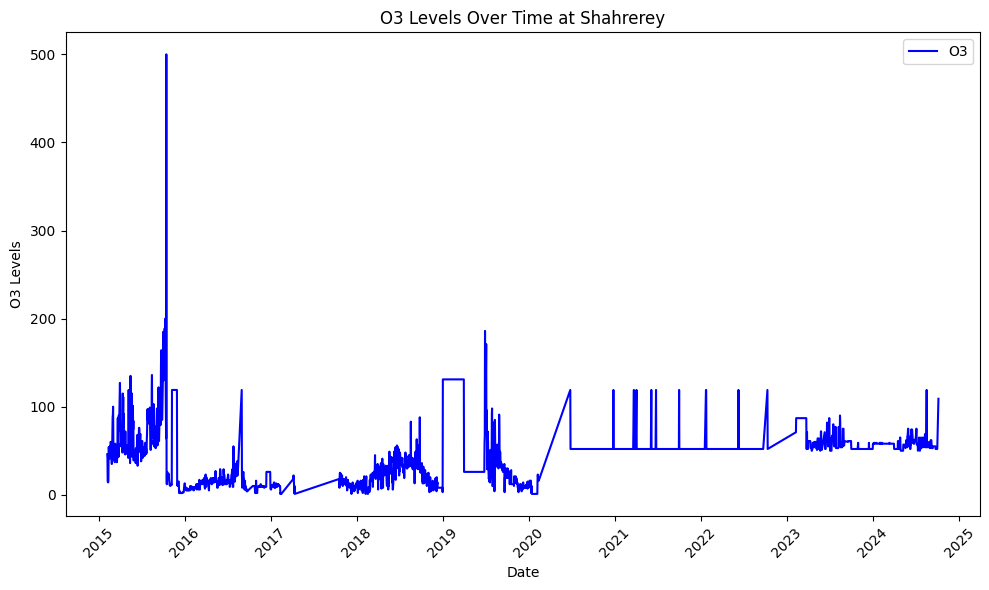

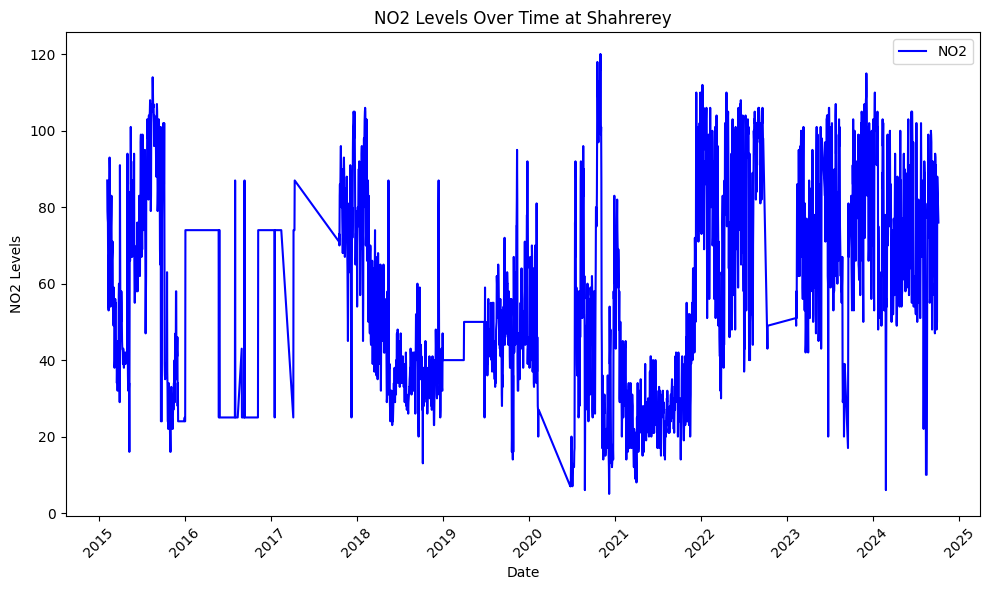

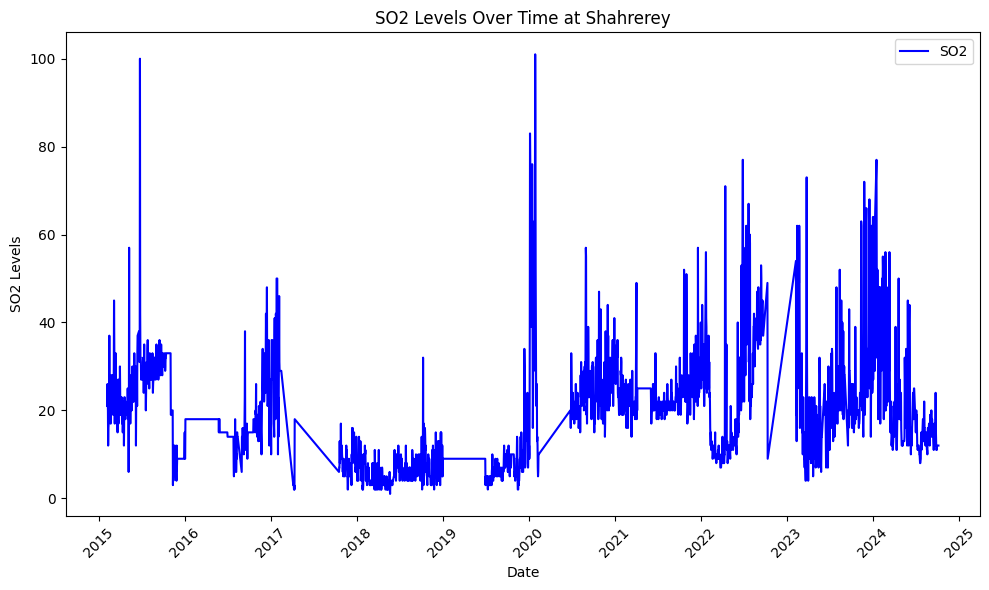

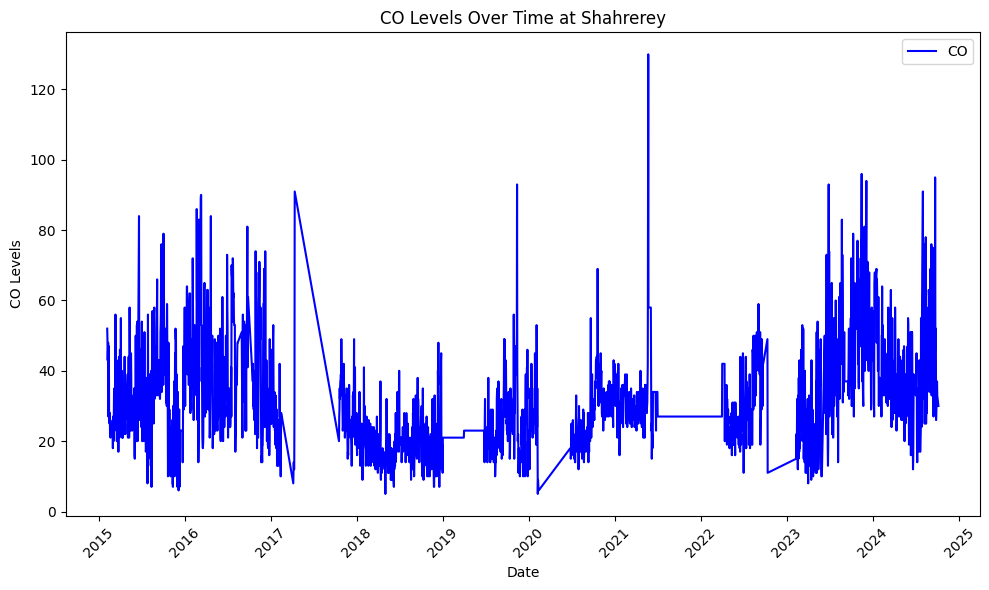

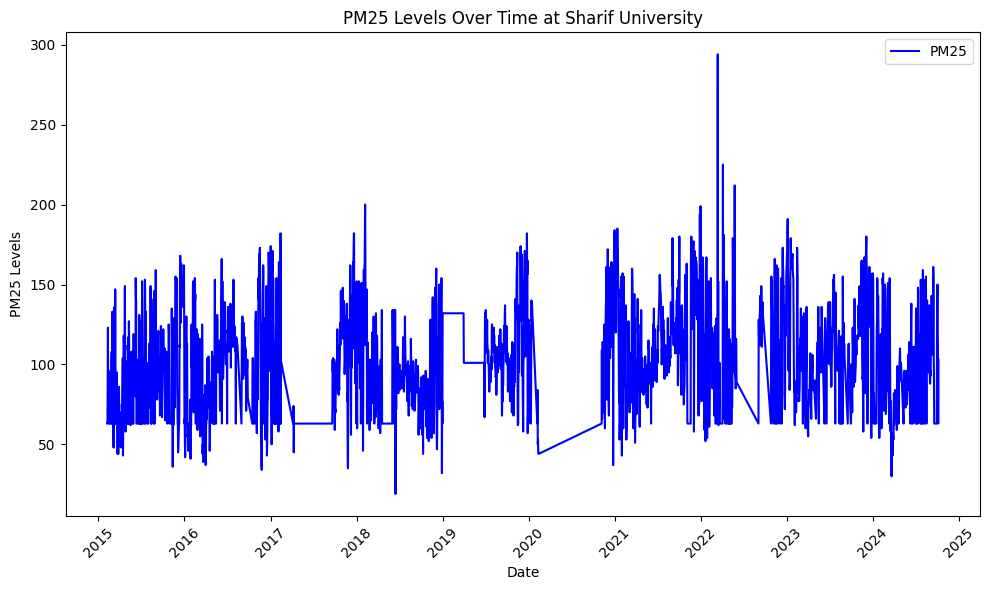

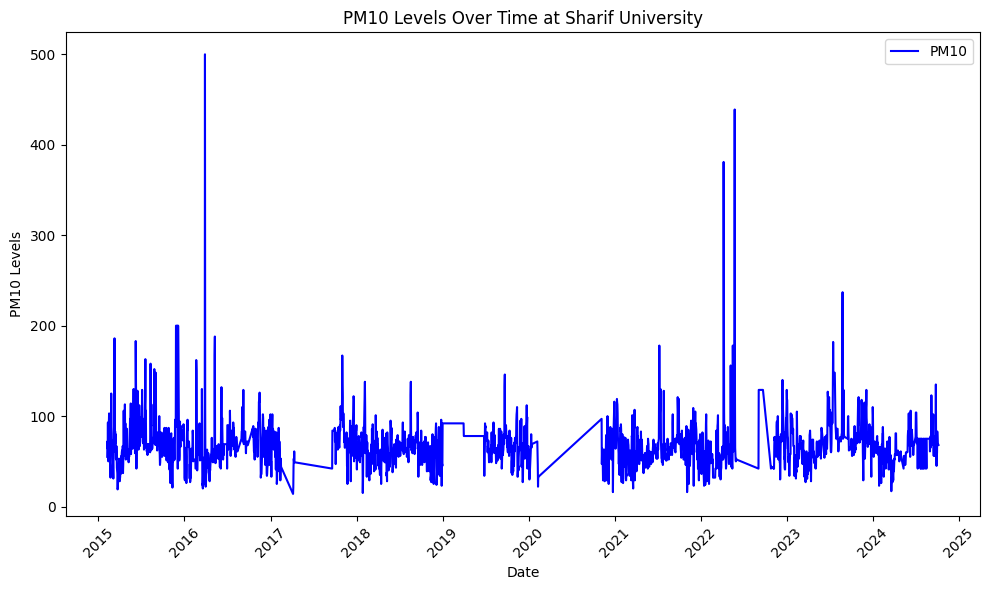

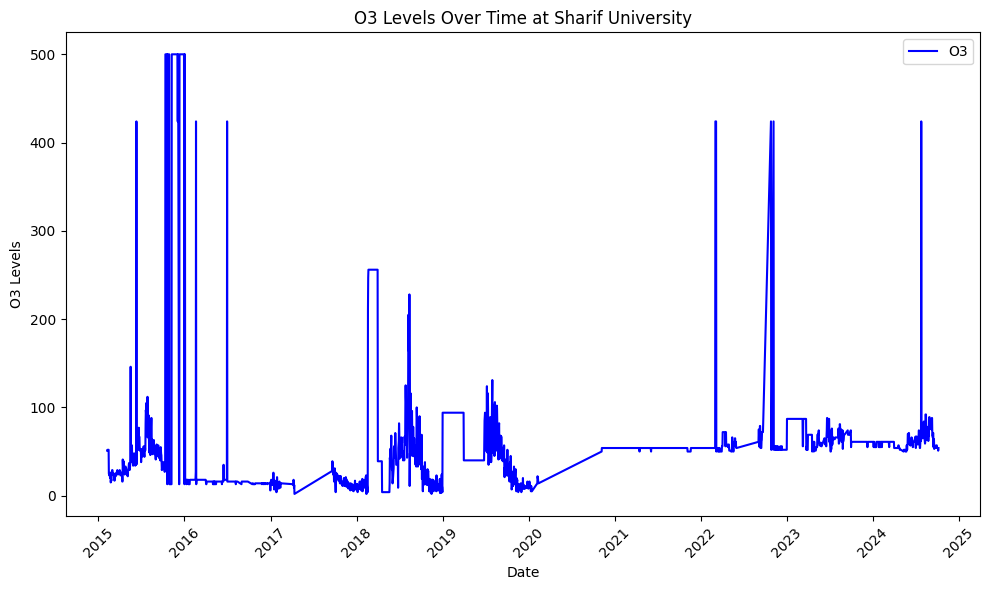

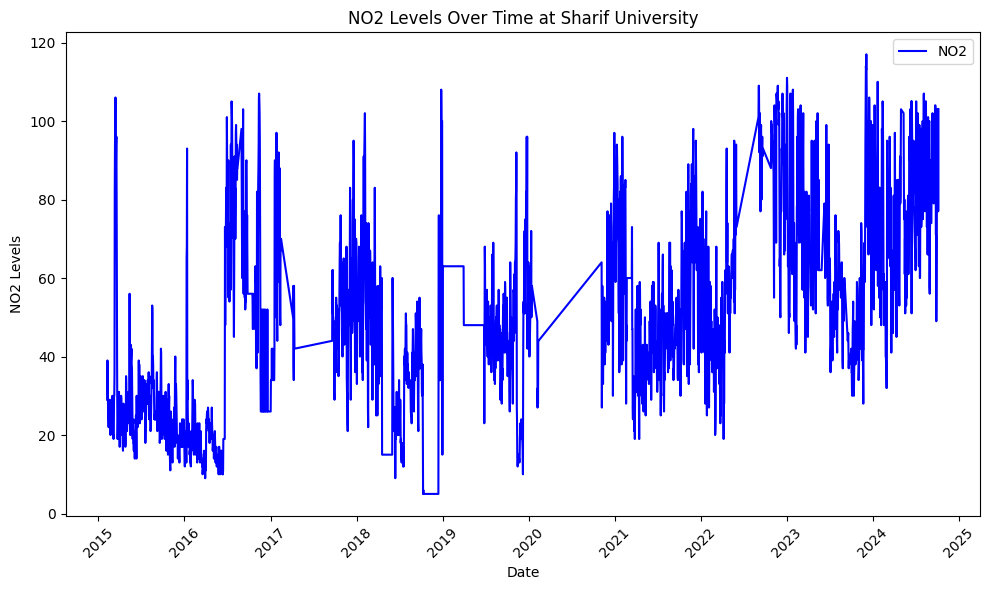

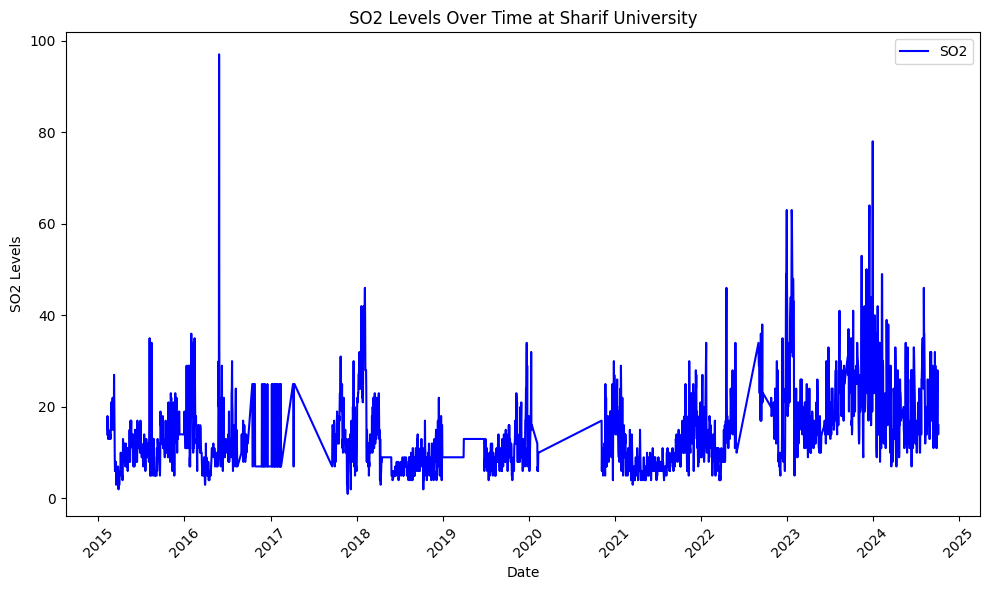

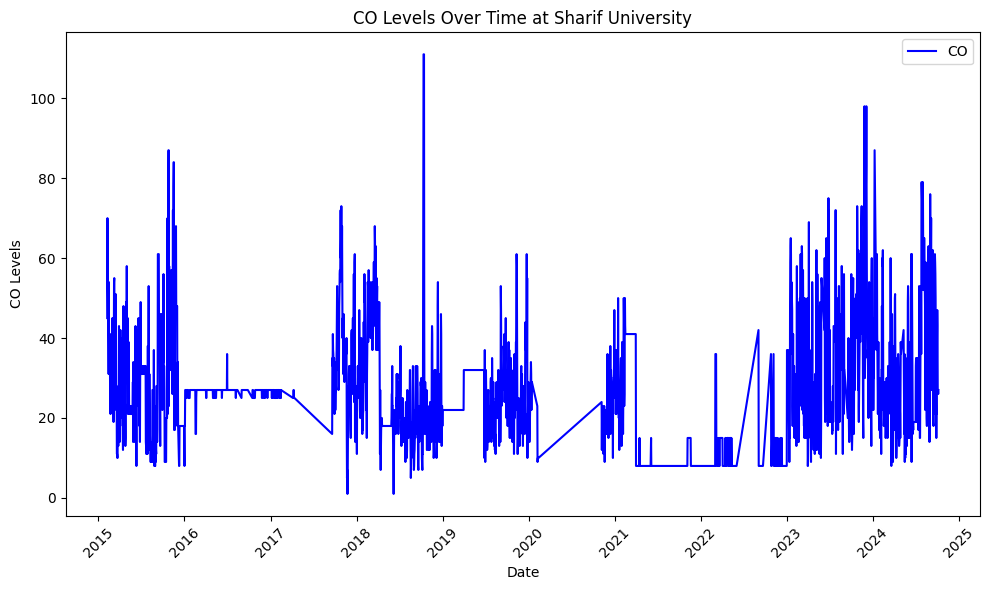

In [227]:
# Define pollutants to plot
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Function to create time series plots
def plot_time_series(df, station_name):
    for pollutant in pollutants:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df[pollutant], label=pollutant.upper(), color='blue')
        plt.xlabel('Date')
        plt.ylabel(f'{pollutant.upper()} Levels')
        plt.title(f'{pollutant.upper()} Levels Over Time at {station_name}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plot time series for Shahrerey station
plot_time_series(df_shahrerey, 'Shahrerey')

# Plot time series for Sharif University station
plot_time_series(df_sharifuniversity, 'Sharif University')


# Histograms

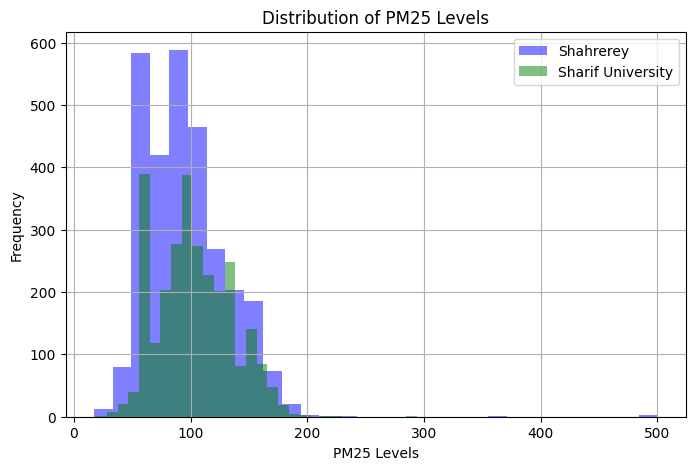

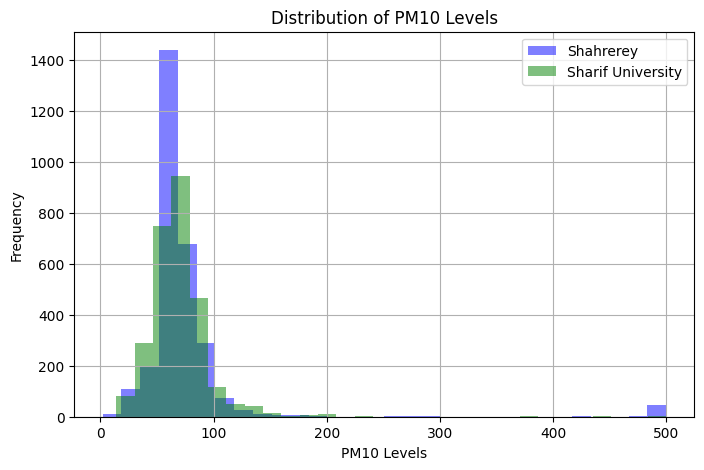

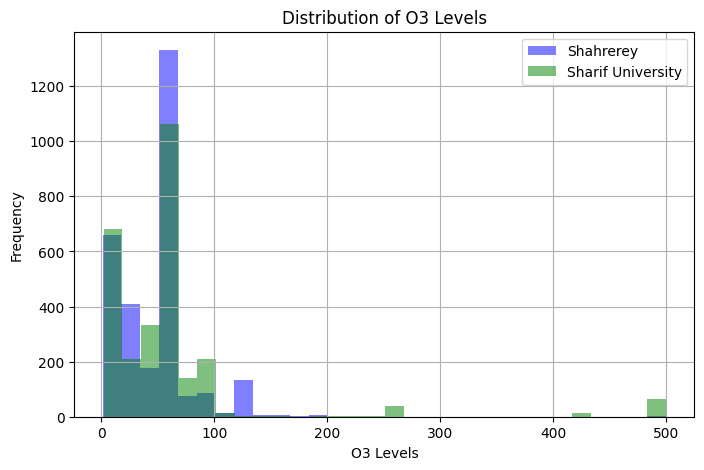

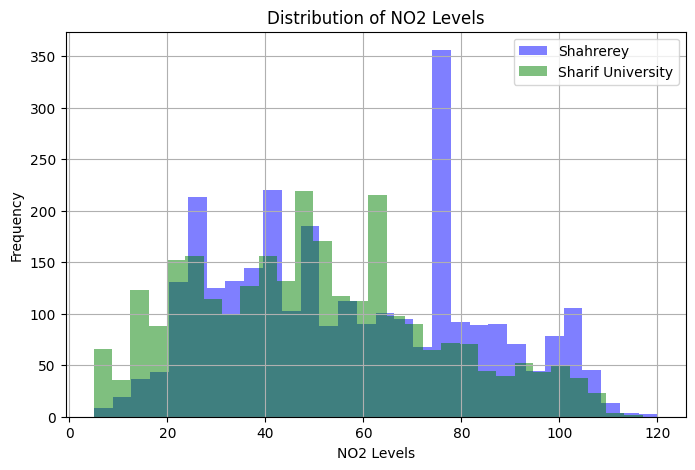

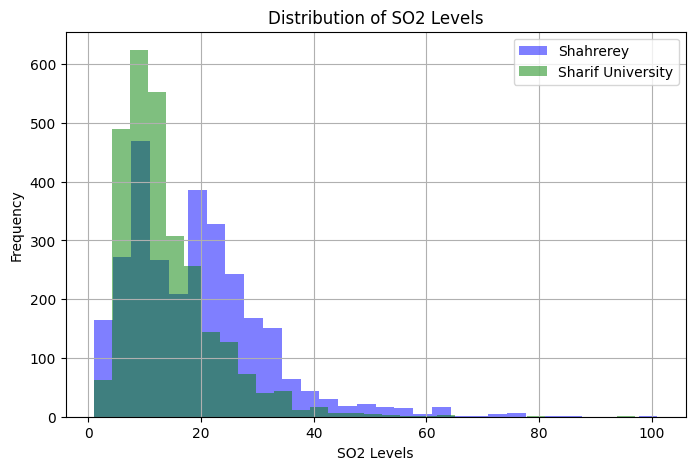

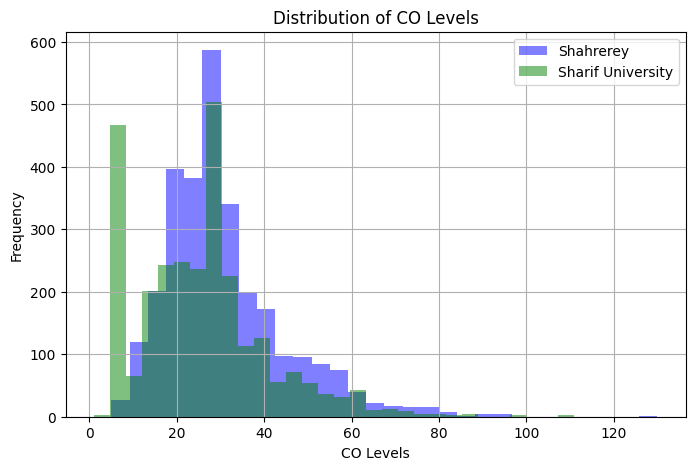

In [228]:
import matplotlib.pyplot as plt

# Define the pollutants to create histograms for
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Function to create histograms for both stations
def plot_histograms(df1, df2, station1_name, station2_name):
    for pollutant in pollutants:
        plt.figure(figsize=(8, 5))
        df1[pollutant].hist(bins=30, alpha=0.5, label=station1_name, color='blue')
        df2[pollutant].hist(bins=30, alpha=0.5, label=station2_name, color='green')
        plt.title(f'Distribution of {pollutant.upper()} Levels')
        plt.xlabel(f'{pollutant.upper()} Levels')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Generate histograms for each pollutant for both stations
plot_histograms(df_shahrerey, df_sharifuniversity, 'Shahrerey', 'Sharif University')


# Correlation Analysis

In [229]:
df_shahrerey.corr()

pm25      pm10        o3       no2       so2        co
pm25  1.000000 -0.032680 -0.051806  0.213036  0.089066  0.081219
pm10 -0.032680  1.000000  0.213030 -0.005460  0.063113  0.089466
o3   -0.051806  0.213030  1.000000  0.050695  0.168789  0.033475
no2   0.213036 -0.005460  0.050695  1.000000  0.306956  0.342260
so2   0.089066  0.063113  0.168789  0.306956  1.000000  0.327211
co    0.081219  0.089466  0.033475  0.342260  0.327211  1.000000

# Plotting

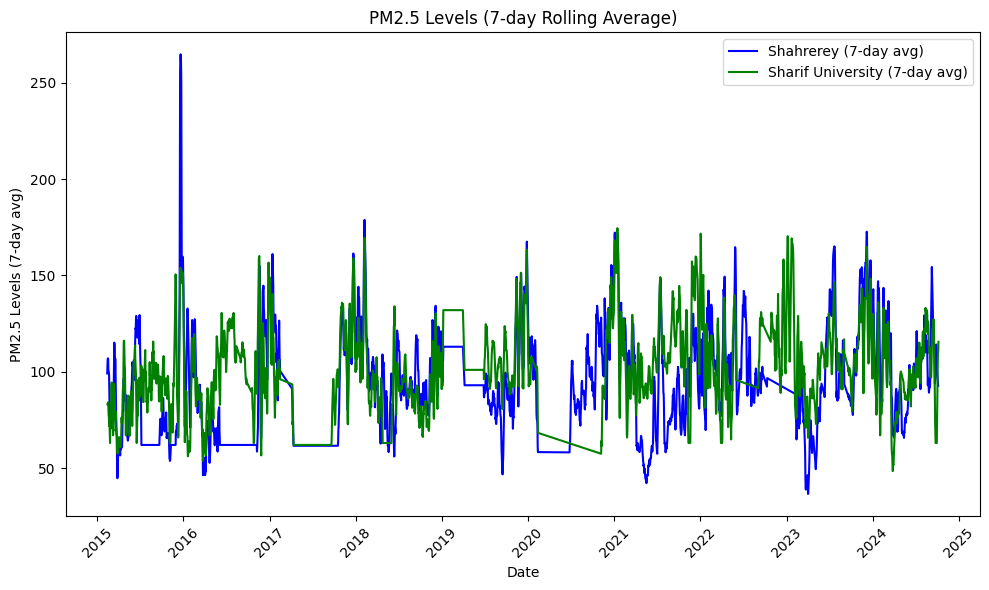

In [230]:
# Apply rolling average (7-day window)
df_shahrerey['pm25_rolling'] = df_shahrerey['pm25'].rolling(window=7).mean()
df_sharifuniversity['pm25_rolling'] = df_sharifuniversity['pm25'].rolling(window=7).mean()

# Plot rolling average
plt.figure(figsize=(10, 6))
plt.plot(df_shahrerey['date'], df_shahrerey['pm25_rolling'], label='Shahrerey (7-day avg)', color='blue')
plt.plot(df_sharifuniversity['date'], df_sharifuniversity['pm25_rolling'], label='Sharif University (7-day avg)', color='green')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (7-day avg)')
plt.title('PM2.5 Levels (7-day Rolling Average)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


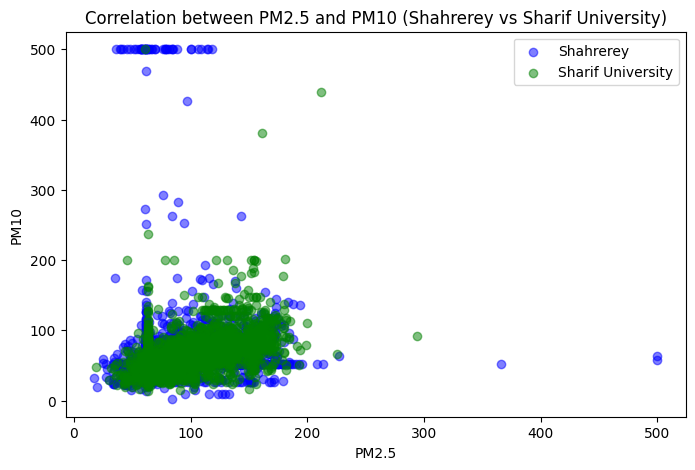

In [231]:
# Scatter plot for correlation between PM2.5 and PM10
plt.figure(figsize=(8, 5))
plt.scatter(df_shahrerey['pm25'], df_shahrerey['pm10'], label='Shahrerey', alpha=0.5, color='blue')
plt.scatter(df_sharifuniversity['pm25'], df_sharifuniversity['pm10'], label='Sharif University', alpha=0.5, color='green')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Correlation between PM2.5 and PM10 (Shahrerey vs Sharif University)')
plt.legend()
plt.show()
